# TLC Trip Record Data
Полное описание данных доступно [здесь](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page). Оригинальное описание полей [тут](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

Записи включают поля, в которых указываются даты / время посадки и высадки, места посадки и высадки, расстояния поездки, подробные тарифы, типы тарифов, типы оплаты и количество пассажиров, указанное водителем. Данные, использованные в прилагаемых наборах данных, были собраны и предоставлены в Комиссию по такси и лимузинам Нью-Йорка (TLC) поставщиками технологий, уполномоченными в соответствии с программами повышения качества обслуживания пассажиров такси и ливреи (TPEP / LPEP). Данные поездки не были созданы TLC, и TLC не делает никаких заявлений относительно точности этих данных.

Перед вами набор данных о поездках желтых такси в Нью Йорке за январь 2019 года.

Нам доступны следующие метаданные:
1. VendorID — оператор такси. 1 = Creative Mobile Technologies, 2 = VeriFone Inc. 4 = ?
2. tpep_pickup_datetime — дата и время включения счетчика 
3. tpep_dropoff_datetime — дата и время выключения счетчика
4. Passenger_count — кол-во пассажиров (вводится водителем)
5. Trip_distance — прошедшее расстояние в милях, указанное таксометром
6. PULocationID — Идентификатор зоны в которой счетчик был включен
7. DOLocationID — Идентификатор зоны в которой счетчик был выключен
8. RateCodeID — тариф в конце поездки

1 = Стандартный тариф

2 = Аэропорт JFK

3 = Ньюарк

4 = Нассау или Вестчестер

5 = Договорной тариф

6 = Групповая поездка

9. Store_and_fwd_flag — Этот флаг показывает хранились ли данные о поездке "внутри машины", если не было соединения с сервером.
10. Payment_type — Код, обозначающий тип оплаты

1 = Кредитка

2 = Наличные

3 = Бесплатно или не было оплаты

4 = Спор (диспут)

5 = Неизвестно

6 = Аннулированная поездка
11. Fare_amount — время-дистанция, посчитанная счетчиком (что-то вроде нормированной длины поездки с учетом времени и дистанции, безразмерная величина)
12. Extra — Разные прибавки и доплаты. В данный момент включает в себя только 0.5\$ и 1\$ в час пик и ночная оплата
13. MTA_tax — Metropolitan commuter transportation mobility tax. Налог, выставляемый автоматически по пробегу
14. Improvement_surcharge — надбавка за благоустройство 0.30\$ (появилась в 2015)
15. Tip_amount — чаевые, заполняется автоматически для кредитных карт, наличные не считаются
16. Tolls_amount — Общая сумма всех сборов за поездку (налоговых и проч)
17. Total_amount — Суммарная стоимость
18. congestion_surcharge — сбор за пробки

FYI
[Разница между желтым и зеленым такси](https://freetoursbyfoot.com/taxi-guide-hailing-cab-nyc/) и еще [тут](https://en.wikipedia.org/wiki/Boro_taxi)

# Задание
1. Проведите ABC анализ по стартовым-конечным локациям поездок. Существенно ли результаты анализа различаются в разбивке по операторам такси?
2. Проведите XYZ анализ по стартовым-конечным локациям поездок. Существенно ли результаты анализа различаются в разбивке по операторам такси?
3. Для нескольких одинаковых зон посадки и высадки (штук 5) сравните средние значения длительности поездки для операторов 1 и 2. Проверьте истинность гипотезы о равенстве среднего времени для выбранных маршрутов с помощью t критерия и pvalue ([модуль stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html))
4. В базе student_x создайте таблицу для загрузки этого набора данных. Загрузите набор данных в созданную таблицу, и затем в redash постройте дэшборд отражающий кол-во поездок каждый день в разбивке по операторам такси, а также общую сумму выручки за вычетом налогов.

Загрузить данные можно по аналогии, для этого нужно "подсоединить" свой гугл драйв к ноутбуку
https://drive.google.com/file/d/1xWbT8jYI-YrrOD991NODC9zRlzmQAoQ3/view?usp=sharing 

Предварительно нужно скопировать данные себе на гугл драйв. Самый простой способ это "создать ярлык", чтобы не скачивать, а потом не загружать 600мб данных
https://drive.google.com/file/d/1eIQC77qhkAdzoigmXR6jo2jLBCISx3vP/view?usp=sharing

# Новый раздел

In [2]:
#!ls "/content/drive/My Drive/Проект/2"
#/Проект"

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [305]:
from scipy import stats as st

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/drive/My Drive/Проект/2/yellow_tripdata_2019-01.csv')
data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [4]:
data.info()#посмотрим на типы данных наших столбцов. 1)где можно сократить использования памяти; 2)где нужно привести к правильному

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   RatecodeID             int64  
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.0+ GB


In [5]:
def check_average_memory_col(df):
  for dtype in ['float','int','object', 'category']:
      selected_dtype = df.select_dtypes(include=[dtype])
      mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
      mean_usage_mb = mean_usage_b / 1024 ** 2
      print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))
check_average_memory_col(data)

Average memory usage for float columns: 52.65 MB
Average memory usage for int columns: 50.14 MB
Average memory usage for object columns: 383.91 MB
Average memory usage for category columns: 0.00 MB


In [9]:
data.isna().sum(axis=0)#NaNы есть только в последнем столбце, сперва преобразуем типы данных. 

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
RatecodeID                     0
store_and_fwd_flag             0
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     4855978
dtype: int64

In [10]:
float_cols = data.select_dtypes(include=['float'])#выбираем все колонки float, пробуем использовать менее затратный тип данных
for col in float_cols.columns:
  data[col] = pd.to_numeric(data[col], downcast='float')

In [11]:
data.info()# все float-колонки привелись к float32, на 20% уменьшили размер. Рассмотрим другие столбцы.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float32
 5   RatecodeID             int64  
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float32
 11  extra                  float32
 12  mta_tax                float32
 13  tip_amount             float32
 14  tolls_amount           float32
 15  improvement_surcharge  float32
 16  total_amount           float32
 17  congestion_surcharge   float32
dtypes: float32(9), int64(6), object(3)
memory usage: 789.8+ MB


In [12]:
data['store_and_fwd_flag'].value_counts()

N    7630142
Y      37650
Name: store_and_fwd_flag, dtype: int64

In [13]:
data.replace({'store_and_fwd_flag':{'Y':1, 'N':0}}, inplace=True)
data['store_and_fwd_flag'].value_counts()#будем использовать тип данных bool

0    7630142
1      37650
Name: store_and_fwd_flag, dtype: int64

In [14]:
data['RatecodeID'].value_counts()# используем category. есть значение 99-которого нет в описании данных.

1     7430139
2      166090
5       54569
3       11801
4        4895
99        252
6          46
Name: RatecodeID, dtype: int64

In [15]:
data[data['RatecodeID'] == 99].describe()#оставим пока без изменений, но уже видны явные выбросы

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,252.000000,252.000000,252.000000,252.0,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,80.0
mean,1.638889,0.960317,0.844920,99.0,0.059524,201.888889,206.190476,1.694444,1604.334473,0.291667,0.314484,0.453849,0.207619,0.142857,1605.858643,0.0
std,0.592580,1.245875,2.086770,0.0,0.237073,71.645400,72.123534,0.533620,6307.476074,0.587426,0.233112,1.923253,1.206523,0.150128,6307.092285,0.0
min,1.000000,0.000000,0.000000,99.0,0.000000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,0.000000,0.000000,99.0,0.000000,143.000000,151.000000,1.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,5.300000,0.0
50%,2.000000,1.000000,0.000000,99.0,0.000000,235.000000,237.000000,2.000000,8.670000,0.000000,0.500000,0.000000,0.000000,0.000000,10.300000,0.0
75%,2.000000,1.000000,1.102500,99.0,0.000000,264.000000,264.000000,2.000000,27.812500,0.500000,0.500000,0.000000,0.000000,0.300000,29.377500,0.0
max,4.000000,6.000000,23.889999,99.0,1.000000,265.000000,265.000000,3.000000,36090.300781,5.300000,0.500000,14.000000,12.000000,0.300000,36090.300781,0.0


In [16]:
data['VendorID'].value_counts()# используем category

2    4652191
1    2938778
4      76823
Name: VendorID, dtype: int64

In [17]:
data['passenger_count'].value_counts()# используем int8

1    5456121
2    1114106
5     323842
3     314721
6     200811
4     140753
0     117381
8         29
7         19
9          9
Name: passenger_count, dtype: int64

In [18]:
print(data['PULocationID'].min(), 'min', data['PULocationID'].max(), 'max')
data['PULocationID'].value_counts()# используем int16

1 min 265 max


237    332473
236    323008
161    312392
162    277166
230    263646
        ...  
204         3
176         2
199         2
104         1
84          1
Name: PULocationID, Length: 263, dtype: int64

In [19]:
print(data['DOLocationID'].min(), 'min', data['DOLocationID'].max(), 'max')
data['DOLocationID'].value_counts()# используем int16

1 min 265 max


236    334323
237    296185
161    293782
170    242037
162    232451
        ...  
253        45
30         24
2          14
99         12
105         4
Name: DOLocationID, Length: 261, dtype: int64

In [20]:
data['payment_type'].value_counts()#category

1    5486027
2    2137415
3      33186
4      11164
Name: payment_type, dtype: int64

In [21]:
data['improvement_surcharge'].value_counts()

 0.3    7658005
-0.3       7129
 0.0       2657
 0.6          1
Name: improvement_surcharge, dtype: int64

In [22]:
#сделаем преобразование типов, все описанные столбцы + поменять столбцы с датой временем к необходимому типу
data = data.astype({'VendorID':'category',
             'tpep_pickup_datetime':'datetime64[s]',
             'tpep_dropoff_datetime':'datetime64[s]',
             'passenger_count':'int8',
             'RatecodeID':'category',
             'store_and_fwd_flag':'bool',
             'PULocationID':'int16',
             'DOLocationID':'int16',
             'payment_type':'category',
             })
data.info()
#объем сократился еще на 30% от первоночального

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               category      
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int8          
 4   trip_distance          float32       
 5   RatecodeID             category      
 6   store_and_fwd_flag     bool          
 7   PULocationID           int16         
 8   DOLocationID           int16         
 9   payment_type           category      
 10  fare_amount            float32       
 11  extra                  float32       
 12  mta_tax                float32       
 13  tip_amount             float32       
 14  tolls_amount           float32       
 15  improvement_surcharge  float32       
 16  total_amount           float32       
 17  congestion_surcharge   float32       
dtypes: bool(1), category(3

In [23]:
data.memory_usage(deep=True)

Index                         128
VendorID                  7667896
tpep_pickup_datetime     61342336
tpep_dropoff_datetime    61342336
passenger_count           7667792
trip_distance            30671168
RatecodeID                7668168
store_and_fwd_flag        7667792
PULocationID             15335584
DOLocationID             15335584
payment_type              7667984
fare_amount              30671168
extra                    30671168
mta_tax                  30671168
tip_amount               30671168
tolls_amount             30671168
improvement_surcharge    30671168
total_amount             30671168
congestion_surcharge     30671168
dtype: int64

In [24]:
data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,False,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.950000,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,False,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.299999,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,False,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.800000,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,False,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.550000,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,False,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.549999,NaN


In [25]:
data.select_dtypes(include=['float32']).describe()#видим что есть отрицательные данные и очень большие значения с разными знаками

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,2.811814e+06
mean,2.797216e+00,1.250401e+01,3.280383e-01,4.968458e-01,1.826318e+00,3.164972e-01,2.754472e-01,1.567955e+01,3.289691e-05
std,3.699047e+00,2.619161e+02,5.094666e-01,5.328424e-02,2.503460e+00,2.004762e+00,2.925499e-02,2.620602e+02,9.068676e-03
min,0.000000e+00,-3.620000e+02,-6.000000e+01,-5.000000e-01,-6.350000e+01,-7.000000e+01,-3.000000e-01,-3.628000e+02,0.000000e+00
25%,9.000000e-01,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.190000e+00,0.000000e+00
50%,1.530000e+00,8.500000e+00,0.000000e+00,5.000000e-01,1.430000e+00,0.000000e+00,3.000000e-01,1.127000e+01,0.000000e+00
75%,2.800000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.330000e+00,0.000000e+00,3.000000e-01,1.656000e+01,0.000000e+00
max,8.318000e+02,6.232599e+05,5.353800e+02,6.080000e+01,7.872500e+02,3.288000e+03,6.000000e-01,6.232617e+05,2.500000e+00


In [26]:
data_without_amount = data[data['total_amount'] == 0]#посотрим сперва на данные с 0вой оплатой
data_without_amount#в первой же строчке видим, 0вую дистанцию, но смену локации, нужно посмотреть поподробнее на данные

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
3552,1,2019-01-01 00:18:46,2019-01-01 00:18:46,1,0.0,5,False,186,264,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9138,1,2019-01-01 00:41:47,2019-01-01 00:41:47,1,0.0,5,True,246,264,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
13256,2,2019-01-01 00:19:38,2019-01-01 00:20:35,1,0.0,1,False,193,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
13257,2,2019-01-01 00:43:34,2019-01-01 00:43:34,1,0.0,1,False,7,7,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
13258,2,2019-01-01 00:02:52,2019-01-01 00:02:52,1,0.0,1,False,264,7,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7656282,2,2019-01-31 20:56:35,2019-01-31 22:37:18,1,0.0,1,False,151,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7667788,2,2019-01-31 23:32:03,2019-01-31 23:33:11,1,0.0,1,False,193,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7667789,2,2019-01-31 23:36:36,2019-01-31 23:36:40,1,0.0,1,False,264,264,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7667790,2,2019-01-31 23:14:53,2019-01-31 23:15:20,1,0.0,1,False,264,7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
data_without_amount['VendorID'].value_counts()

2    1160
1     254
4       0
Name: VendorID, dtype: int64

In [28]:
data_without_amount['payment_type'].value_counts()# по описанию данным, все записи с 0вой оплтой должны былить иметь 3-4 тип

1    815
2    569
3     29
4      1
Name: payment_type, dtype: int64

In [29]:
data_without_amount['store_and_fwd_flag'].value_counts()#все записи были при отсутствии сети

False    1302
True      112
Name: store_and_fwd_flag, dtype: int64

In [30]:
data_without_amount['RatecodeID'].value_counts()#имеются разлинчые тарифы, но 5(договорная оплата), явно не большинство

1     1204
5      152
2       31
99      19
3        5
4        2
6        1
Name: RatecodeID, dtype: int64

In [31]:
data_without_amount['trip_distance'].value_counts()#болшая часть поездок без дистанции

0.00    1270
0.01       4
1.00       4
0.02       4
1.40       3
        ... 
0.20       1
0.77       1
3.09       1
1.14       1
0.12       1
Name: trip_distance, Length: 110, dtype: int64

In [32]:
data_without_amount.apply(lambda x:x['DOLocationID'] == x['PULocationID'], axis=1).value_counts()#локация сменялась чаще, чем дистанция была не 0вой

True     914
False    500
dtype: int64

In [33]:
data.drop(index=data_without_amount.index, inplace=True)#удалим эти данные с 0вым amount

In [34]:
data_with_negative_amount = data[data['total_amount'] < 0]#данные с отрицательным amount
data_with_negative_amount

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
663,2,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,False,148,148,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.800000,NaN
2402,2,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,False,170,238,4,-19.0,-0.5,-0.5,0.0,0.0,-0.3,-20.299999,NaN
2541,2,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,False,162,234,4,-8.5,-0.5,-0.5,0.0,0.0,-0.3,-9.800000,NaN
2544,2,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,False,234,234,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.800000,NaN
2547,2,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,False,234,234,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.300000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665612,2,2019-01-31 23:24:31,2019-01-31 23:25:52,1,0.34,1,False,161,237,3,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.300000,0.0
7666343,2,2019-01-31 23:36:37,2019-01-31 23:37:44,1,0.17,1,False,68,158,3,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.300000,0.0
7666452,2,2019-01-31 23:08:30,2019-01-31 23:19:27,2,0.58,1,False,162,229,3,-8.0,-0.5,-0.5,0.0,0.0,-0.3,-9.300000,0.0
7666601,2,2019-01-31 23:42:48,2019-01-31 23:48:23,1,0.68,1,False,211,211,4,-5.5,-0.5,-0.5,0.0,0.0,-0.3,-6.800000,0.0


In [35]:
data_with_negative_amount['VendorID'].value_counts()#во всех случаях оператор был один, посмотрим на остальные колонки

2    7131
4       0
1       0
Name: VendorID, dtype: int64

In [36]:
data_with_negative_amount['store_and_fwd_flag'].value_counts()

False    7131
Name: store_and_fwd_flag, dtype: int64

In [37]:
data_with_negative_amount['RatecodeID'].value_counts()

1     6276
2      406
5      395
3       52
6        2
99       0
4        0
Name: RatecodeID, dtype: int64

In [38]:
data_with_negative_amount['payment_type'].value_counts(normalize=True)#95% отвечают категориям к которым вероятно должны были принадлежать
#(бесплатная поездка или спор)

3    0.573272
4    0.373861
2    0.052728
1    0.000140
Name: payment_type, dtype: float64

In [39]:
print(data_with_negative_amount['total_amount'].sum() * (-1), ' total negative amount')
#наверное странный тот факт, что записи такие только у 2ой компании

79859.3671875  total negative amount


In [41]:
#посмотрим теперь на 3-4ый тип оплаты(бесплатная поездка, спор) с положительным amount
data_3_4_type_pay = data[((data['payment_type']==3) | (data['payment_type']==4)) & (data['total_amount'] > 0)]
data_3_4_type_pay['VendorID'].value_counts()#все записи от одной компании

1    37566
4        0
2        0
Name: VendorID, dtype: int64

In [42]:
#с отрицательным amount, как и было ранее сказано, все записи от другой компании
data[((data['payment_type']==3) | (data['payment_type']==4)) & (data['total_amount'] < 0)]['VendorID'].value_counts()

2    6754
4       0
1       0
Name: VendorID, dtype: int64

In [43]:
data_3_4_type_pay['total_amount'].sum()
#общий amount данных записей значительно больше
#могу предположить, что записи категории "3","4" от компании "1" также должны быть со знаком "-".Преобразуем.

1195062.4

In [44]:
data_3_4_type_pay['congestion_surcharge'].value_counts()#в данном столбце нет положительных значений, можно не преобразовывать

0.0    13477
Name: congestion_surcharge, dtype: int64

In [45]:
float_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']
data.loc[data_3_4_type_pay.index, float_columns] = data.loc[data_3_4_type_pay.index, float_columns] * -1

In [46]:
data[((data['payment_type']==3) | (data['payment_type']==4)) & (data['total_amount'] < 0)]['VendorID'].value_counts()

1    37566
2     6754
4        0
Name: VendorID, dtype: int64

In [47]:
data[((data['payment_type']==3) | (data['payment_type']==4)) & (data['total_amount'] >= 0)]['VendorID'].value_counts()
#теперь все данные с payment_type 3/4 имеют отрицательные значения

4    0
2    0
1    0
Name: VendorID, dtype: int64

In [48]:
data.info()#повысился объем занимаемой памяти

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7666378 entries, 0 to 7667787
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               category      
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int8          
 4   trip_distance          float32       
 5   RatecodeID             category      
 6   store_and_fwd_flag     bool          
 7   PULocationID           int16         
 8   DOLocationID           int16         
 9   payment_type           category      
 10  fare_amount            float32       
 11  extra                  float32       
 12  mta_tax                float32       
 13  tip_amount             float32       
 14  tolls_amount           float32       
 15  improvement_surcharge  float32       
 16  total_amount           float32       
 17  congestion_surcharge   float32       
dtypes: bool(1), category(3

In [49]:
data.memory_usage(deep=True)#все дело в индексе

Index                    396875344
VendorID                   7666482
tpep_pickup_datetime      61331024
tpep_dropoff_datetime     61331024
passenger_count            7666378
trip_distance             30665512
RatecodeID                 7666754
store_and_fwd_flag         7666378
PULocationID              15332756
DOLocationID              15332756
payment_type               7666570
fare_amount               30665512
extra                     30665512
mta_tax                   30665512
tip_amount                30665512
tolls_amount              30665512
improvement_surcharge     30665512
total_amount              30665512
congestion_surcharge      30665512
dtype: int64

In [50]:
data.index = pd.RangeIndex(len(data.index))#переустановим

In [51]:
data.memory_usage(deep=True)#отлично

Index                         128
VendorID                  7666482
tpep_pickup_datetime     61331024
tpep_dropoff_datetime    61331024
passenger_count           7666378
trip_distance            30665512
RatecodeID                7666754
store_and_fwd_flag        7666378
PULocationID             15332756
DOLocationID             15332756
payment_type              7666570
fare_amount              30665512
extra                    30665512
mta_tax                  30665512
tip_amount               30665512
tolls_amount             30665512
improvement_surcharge    30665512
total_amount             30665512
congestion_surcharge     30665512
dtype: int64

In [52]:
#рассмотрим данные на выбросы
data['extra'].value_counts()#удалим явнопревыщающее норму и редкое значение

 0.000000      4198441
 0.500000      2104905
 1.000000      1310726
 4.500000        30946
-0.500000        13790
-1.000000         6717
-4.500000          374
 0.800000          229
 1.300000           74
 17.500000          63
 1.800000           34
 2.500000           21
 0.300000           10
 18.000000           9
 3.000000            7
 18.500000           6
 5.300000            4
 0.200000            3
 2.300000            1
 3.500000            1
 1.100000            1
-2.500000            1
 10.900000           1
-17.000000           1
 0.950000            1
 0.450000            1
-0.400000            1
 23.040001           1
 31.730000           1
-36.709999           1
-60.000000           1
 0.700000            1
 1.500000            1
-0.490000            1
 0.110000            1
 0.250000            1
 535.380005          1
Name: extra, dtype: int64

In [53]:
ind_for_delete = data[data['extra'] > 500].index
print(data.loc[ind_for_delete])#также видим выброс в другой колонке, все из-за fare_amount
data.drop(index=ind_for_delete, inplace=True)

        VendorID tpep_pickup_datetime  ...  total_amount  congestion_surcharge
5322400        1  2019-01-23 08:58:09  ...  356214.78125                   0.0

[1 rows x 18 columns]


In [54]:
np.percentile(data['fare_amount'], 99.9)

85.0

In [55]:
data_with_big_amount = data[data['fare_amount'] > 100].copy()#данные с редко большим fare_amount
data_with_big_amount

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1105,2,2019-01-01 00:23:11,2019-01-01 00:23:25,1,0.340000,5,False,265,265,1,160.0,0.0,0.0,25.000000,0.0,0.3,185.300003,NaN
2223,2,2019-01-01 00:38:36,2019-01-01 01:21:33,2,33.189999,5,False,107,265,1,121.0,0.0,0.0,0.080000,10.5,0.3,131.880005,NaN
4067,1,2019-01-01 00:13:17,2019-01-01 01:06:13,1,44.099998,5,False,132,265,2,150.0,0.0,0.0,0.000000,0.0,0.3,150.300003,NaN
4956,2,2018-12-31 23:59:57,2019-01-01 00:00:00,4,0.000000,5,False,264,265,1,121.0,0.0,0.5,36.540001,0.0,0.3,158.339996,NaN
5154,2,2019-01-01 00:22:44,2019-01-01 00:22:50,1,0.970000,5,False,265,265,1,120.0,0.0,0.5,30.200001,0.0,0.3,151.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663933,2,2019-01-31 23:15:10,2019-01-31 23:15:20,1,0.000000,5,False,68,68,1,115.0,0.0,0.0,0.000000,0.0,0.3,115.300003,0.0
7664160,2,2019-01-31 23:02:04,2019-01-31 23:02:07,1,0.000000,5,False,264,265,1,117.0,0.0,0.5,23.559999,0.0,0.3,141.360001,0.0
7664335,1,2019-01-31 23:07:02,2019-01-31 23:08:51,1,0.000000,5,False,265,265,1,127.0,0.0,0.0,1.000000,0.0,0.3,128.300003,0.0
7664394,2,2019-01-31 23:29:02,2019-01-31 23:29:06,1,0.000000,5,False,138,264,2,130.0,0.0,0.5,0.000000,0.0,0.3,130.800003,0.0


In [56]:
data_with_big_amount_short_dis = data_with_big_amount[data_with_big_amount['trip_distance'] < 5]#также достаточно маленьким путем
#сделаем столбец с отображением времени поездки
data_with_big_amount_short_dis['s_trip'] = data_with_big_amount_short_dis.apply(lambda x:(x['tpep_dropoff_datetime'] - x['tpep_pickup_datetime']).total_seconds(), axis=1)
data_with_big_amount_short_dis[data_with_big_amount_short_dis['s_trip'] < 120]
#мне кажется что в данных записях такие редкие цифры, при том, что путь и время явно не соответсвует оплате, из-за редкого внешего фактора,
# может поломки какойно по вине клиента, данные с которым вероятно лучше не рассматривать, посмотрим что еще можно найти в этих данных 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,s_trip
1105,2,2019-01-01 00:23:11,2019-01-01 00:23:25,1,0.34,5,False,265,265,1,160.0,0.0,0.0,25.000000,0.00,0.3,185.300003,NaN,14.0
4956,2,2018-12-31 23:59:57,2019-01-01 00:00:00,4,0.00,5,False,264,265,1,121.0,0.0,0.5,36.540001,0.00,0.3,158.339996,NaN,3.0
5154,2,2019-01-01 00:22:44,2019-01-01 00:22:50,1,0.97,5,False,265,265,1,120.0,0.0,0.5,30.200001,0.00,0.3,151.000000,NaN,6.0
8702,1,2019-01-01 00:37:53,2019-01-01 00:39:06,2,0.10,5,False,37,80,1,150.0,0.0,0.0,10.000000,0.00,0.3,160.300003,NaN,73.0
10913,2,2019-01-01 00:47:17,2019-01-01 00:47:20,2,0.00,5,False,265,265,1,150.0,0.0,0.0,0.000000,0.00,0.3,150.300003,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663460,2,2019-01-31 23:39:37,2019-01-31 23:39:48,1,0.00,5,False,265,265,1,170.0,0.0,0.5,35.310001,5.76,0.3,211.869995,0.0,11.0
7663933,2,2019-01-31 23:15:10,2019-01-31 23:15:20,1,0.00,5,False,68,68,1,115.0,0.0,0.0,0.000000,0.00,0.3,115.300003,0.0,10.0
7664160,2,2019-01-31 23:02:04,2019-01-31 23:02:07,1,0.00,5,False,264,265,1,117.0,0.0,0.5,23.559999,0.00,0.3,141.360001,0.0,3.0
7664335,1,2019-01-31 23:07:02,2019-01-31 23:08:51,1,0.00,5,False,265,265,1,127.0,0.0,0.0,1.000000,0.00,0.3,128.300003,0.0,109.0


In [57]:
data_with_big_amount_short_dis[data_with_big_amount_short_dis['s_trip'] < 120]['RatecodeID'].value_counts()
#явное преобладание договорного тарифа и неизвестного

5     1097
99      20
1        3
6        1
4        1
3        0
2        0
Name: RatecodeID, dtype: int64

In [58]:
data_with_big_amount_short_dis[data_with_big_amount_short_dis['s_trip'] < 120]['PULocationID'].value_counts()
#из различных локаций

265    585
264    223
1       62
132     37
138     11
      ... 
114      1
113      1
109      1
108      1
139      1
Name: PULocationID, Length: 90, dtype: int64

In [59]:
#думаю среди данных из посленей таблички выберем индексы у записей для удаления, которые имеют 5/99 тариф

In [60]:
index_for_del = data_with_big_amount_short_dis[(data_with_big_amount_short_dis['s_trip'] < 120) 
& ((data_with_big_amount_short_dis['RatecodeID'] == 5) |(data_with_big_amount_short_dis['RatecodeID'] == 99))].index
data.drop(index=index_for_del, inplace=True)

In [61]:
data[abs(data['fare_amount']) > 500]#также есть разлинчые большие значения изза длительность поездки или включенного счетчика или зачастую другого фактора
#думаю эти данные тоже можно убрать из анализа

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
194405,1,2019-01-02 02:23:48,2019-01-02 02:24:04,1,0.000000,6,False,174,174,3,-655.349976,-0.000000,-0.500000,-0.0,-0.0,-0.3,-656.150024,NaN
478676,1,2019-01-03 13:08:33,2019-01-03 13:08:53,1,0.100000,6,False,264,264,2,6666.649902,0.000000,0.500000,0.0,0.0,0.3,6667.450195,NaN
804760,1,2019-01-04 20:44:24,2019-01-04 20:44:24,1,0.000000,1,True,239,264,2,609.000000,0.500000,0.500000,0.0,0.0,0.3,610.299988,NaN
1938847,2,2019-01-09 19:43:26,2019-01-10 12:43:26,1,8.550000,1,False,90,265,2,519.000000,1.000000,0.500000,0.0,0.0,0.3,520.799988,NaN
2499118,1,2019-01-11 19:33:15,2019-01-11 19:53:09,1,2.400000,1,False,237,90,3,-623259.875000,-1.000000,-0.500000,-0.0,-0.0,-0.3,-623261.687500,NaN
2840447,1,2019-01-12 23:21:48,2019-01-12 23:29:14,1,100.800003,1,False,141,162,3,-8000.299805,31.730000,-32.529999,-0.0,-0.0,-0.0,-8001.100098,NaN
3207628,1,2019-01-14 16:07:50,2019-01-14 16:07:50,0,0.000000,99,False,264,264,3,-16032.469727,-0.000000,-0.000000,-0.0,-0.0,-0.0,-16032.469727,NaN
3207629,1,2019-01-14 16:08:42,2019-01-14 16:08:42,0,0.000000,99,False,264,264,3,-24249.429688,-0.000000,-0.000000,-0.0,-0.0,-0.0,-24249.429688,NaN
3207639,2,2019-01-14 16:27:29,2019-01-15 15:30:26,1,0.000000,1,False,265,264,2,574.299988,0.000000,0.250000,0.0,0.0,0.0,574.549988,NaN
3714985,2,2019-01-16 15:31:14,2019-01-21 15:22:08,1,0.000000,99,False,265,265,2,1079.150024,0.000000,0.250000,0.0,0.0,0.0,1079.400024,NaN


In [62]:
data.drop(index=data[abs(data['fare_amount']) > 500].index, inplace=True)

In [63]:
np.percentile(data['tip_amount'], 99.9)

18.649999618530273

In [64]:
data[data['tip_amount'] > 20]['PULocationID'].value_counts()[:10]

132    1054
138     547
161     191
230     190
265     182
163     169
264     149
162     143
170     120
164     114
Name: PULocationID, dtype: int64

In [65]:
data[data['tip_amount'] > 20]['DOLocationID'].value_counts()[:10]

265    1987
1      1249
132     167
138      83
264      66
170      40
230      36
161      36
236      31
48       28
Name: DOLocationID, dtype: int64

In [66]:
data.loc[data['tip_amount'].sort_values()[-20:].index]#записи с 20ю самыми большими чаевыми.

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2597419,2,2019-01-12 01:47:34,2019-01-12 01:48:23,2,0.000000,1,False,50,50,1,2.5,0.5,0.5,200.000000,0.00,0.3,203.800003,NaN
5384615,2,2019-01-23 12:13:35,2019-01-23 12:16:31,1,0.000000,1,False,264,265,1,2.5,0.0,0.5,200.000000,0.00,0.3,203.300003,0.0
6122124,2,2019-01-26 00:07:57,2019-01-26 00:26:36,2,3.100000,1,False,148,246,1,12.0,0.5,0.5,200.000000,0.00,0.3,213.300003,0.0
2606174,2,2019-01-12 03:00:17,2019-01-12 03:00:28,1,0.000000,5,False,29,29,1,20.0,0.0,0.5,200.000000,0.00,0.3,220.800003,NaN
3505909,2,2019-01-15 18:42:51,2019-01-15 19:13:51,1,3.890000,1,False,186,262,1,20.5,1.0,0.5,202.000000,0.00,0.3,224.300003,NaN
2682833,2,2019-01-12 13:24:53,2019-01-12 13:25:07,1,0.000000,1,False,265,265,1,2.5,0.0,0.5,203.000000,0.00,0.3,206.300003,NaN
1788844,2,2019-01-09 08:26:07,2019-01-09 08:31:33,1,1.050000,1,False,229,140,1,5.5,0.0,0.5,208.000000,0.00,0.3,214.300003,NaN
2450208,2,2019-01-11 16:09:44,2019-01-11 16:58:50,1,10.290000,1,False,68,138,1,39.0,1.0,0.5,212.000000,5.76,0.3,258.559998,NaN
3379566,2,2019-01-15 10:31:12,2019-01-15 10:49:41,2,1.930000,1,False,48,137,1,12.5,0.0,0.5,212.500000,0.00,0.3,225.800003,NaN
2613253,1,2019-01-12 04:18:44,2019-01-12 05:10:21,1,42.099998,5,False,140,265,1,0.0,0.0,0.0,220.000000,0.00,0.3,220.300003,NaN


In [67]:
data.loc[data['tip_amount'].sort_values()[-20:].index]['VendorID'].value_counts()#можно увидеть что в топ по чаевым преобладает фирма "2"

2    17
1     2
4     1
Name: VendorID, dtype: int64

In [68]:
data['mta_tax'].value_counts()#посмотрим на значения с явным отклонением данного показателя

 0.500000     7589518
-0.500000       42790
 0.000000       32835
 0.250000          95
 0.350000           2
 1.000000           1
 0.900000           1
 60.799999          1
 18.299999          1
Name: mta_tax, dtype: int64

In [69]:
data[data['mta_tax'] > 15]# extra + mta_tax. все ок

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2879181,1,2019-01-13 03:06:23,2019-01-13 03:17:59,1,2.1,1,False,264,264,1,10.0,-17.0,18.299999,2.25,0.0,0.0,13.550000,NaN
3724886,1,2019-01-16 15:38:05,2019-01-16 15:57:29,1,2.7,1,False,236,229,1,14.0,-60.0,60.799999,2.00,0.0,0.0,16.799999,NaN


In [70]:
#рассмотрим теперь на валидность данных относительно 0вой дистанции и локаций
data_without_trip = data[data['trip_distance'] == 0].copy()
data_without_trip['s_trip'] = data_without_trip['tpep_dropoff_datetime'] - data_without_trip['tpep_pickup_datetime']#время счетчика
data_without_trip[~data_without_trip.apply(lambda x:x['PULocationID'] == x['DOLocationID'], axis=1)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,s_trip
28,1,2019-01-01 00:32:59,2019-01-01 00:32:59,3,0.0,1,True,237,264,2,6.5,0.5,0.5,0.00,0.00,0.3,7.800000,NaN,0 days 00:00:00
681,1,2019-01-01 00:39:07,2019-01-01 00:39:07,1,0.0,1,False,142,264,2,2.5,0.5,0.5,0.00,0.00,0.3,3.800000,NaN,0 days 00:00:00
1635,1,2019-01-01 00:29:22,2019-01-01 00:36:32,2,0.0,1,False,114,234,1,7.0,0.5,0.5,1.65,0.00,0.3,9.950000,NaN,0 days 00:07:10
1636,1,2019-01-01 00:44:30,2019-01-01 00:51:31,4,0.0,1,False,234,170,2,6.5,0.5,0.5,0.00,0.00,0.3,7.800000,NaN,0 days 00:07:01
1637,1,2019-01-01 00:54:06,2019-01-01 01:03:44,1,0.0,1,False,170,162,2,8.0,0.5,0.5,0.00,0.00,0.3,9.300000,NaN,0 days 00:09:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665436,1,2019-01-31 23:16:13,2019-01-31 23:16:13,1,0.0,1,False,138,264,2,2.5,0.5,0.5,0.00,0.00,0.3,3.800000,0.0,0 days 00:00:00
7665459,1,2019-01-31 23:20:45,2019-01-31 23:20:45,0,0.0,1,False,138,264,2,29.0,0.5,0.5,0.00,5.76,0.3,36.060001,0.0,0 days 00:00:00
7665667,2,2019-01-31 23:07:04,2019-01-31 23:12:42,2,0.0,1,False,161,170,1,5.0,0.5,0.5,1.89,0.00,0.3,8.190000,0.0,0 days 00:05:38
7665668,2,2019-01-31 23:23:42,2019-01-31 23:39:45,2,0.0,1,False,230,79,1,10.5,0.5,0.5,1.10,0.00,0.3,12.900000,0.0,0 days 00:16:03


In [71]:
data_without_trip[~data_without_trip.apply(lambda x:x['PULocationID'] == x['DOLocationID'], axis=1)].describe()

,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,s_trip
count,15063.000000,15063.0,15063.000000,15063.000000,15063.000000,15063.000000,15063.000000,15063.000000,15063.000000,15063.000000,15063.000000,5318.0,15063
mean,1.354179,0.0,191.668127,190.612029,17.505171,0.255463,0.397232,2.428192,0.232151,0.262228,21.085018,0.0,0 days 00:06:57.391754630
std,0.938398,0.0,74.161587,77.266792,24.004383,0.633106,0.249952,6.345254,1.482833,0.135627,27.619453,0.0,0 days 00:46:03.953374514
min,0.000000,0.0,1.000000,1.000000,-224.000000,-4.500000,-0.500000,-2.550000,-11.520000,-0.300000,-224.800003,0.0,0 days 00:00:00
25%,1.000000,0.0,140.000000,137.000000,2.500000,0.000000,0.500000,0.000000,0.000000,0.300000,3.960000,0.0,0 days 00:00:00
50%,1.000000,0.0,230.000000,230.000000,7.000000,0.000000,0.500000,0.000000,0.000000,0.300000,9.300000,0.0,0 days 00:00:04
75%,1.000000,0.0,264.000000,264.000000,20.299999,0.500000,0.500000,2.000000,0.000000,0.300000,24.360001,0.0,0 days 00:03:22
max,9.000000,0.0,265.000000,265.000000,393.670013,23.040001,0.500000,296.700012,70.000000,0.300000,393.920013,0.0,0 days 23:59:44


In [72]:
data['congestion_surcharge'].value_counts()

0.0    2810848
2.5         37
Name: congestion_surcharge, dtype: int64

попробуем преобразовать значения NaN в последнем столбце


In [73]:
without_na_data = data[~data['congestion_surcharge'].isna()]#записи без NaN
with_na_data = data[data['congestion_surcharge'].isna()]#записи с NaN  

In [74]:
def check_total_amount_without_na(x):
  sum = x['fare_amount'] + x['extra'] + x['mta_tax'] + x['tip_amount'] + x['tolls_amount'] + x['improvement_surcharge'] + x['congestion_surcharge']
  return round(sum, 2) == round(x['total_amount'], 2)
def check_total_amount_with_na(x):
  sum = x['fare_amount'] + x['extra'] + x['mta_tax'] + x['tip_amount'] + x['tolls_amount'] + x['improvement_surcharge']
  return round(sum, 2)  == round(x['total_amount'], 2) 
def calculate_diff_without_na(x):
  diff = x['total_amount'] - (x['fare_amount'] + x['extra'] + x['mta_tax'] + x['tip_amount'] + x['tolls_amount'] + x['improvement_surcharge'] + x['congestion_surcharge'])
  return round(diff, 2)
def calculate_diff_with_na(x):
  diff = x['total_amount'] - (x['fare_amount'] + x['extra'] + x['mta_tax'] + x['tip_amount'] + x['tolls_amount'] + x['improvement_surcharge'])
  return round(diff, 2)

In [75]:
sample_data = without_na_data.sample(1000, random_state=13) 
sample_data[~sample_data.apply(check_total_amount_without_na, axis=1)]#есть данные где total_amount не сходится с суммой осталньых оплат

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
7298363,2,2019-01-30 18:49:59,2019-01-30 19:03:59,1,1.90,1,False,148,249,1,10.0,1.0,0.5,2.36,0.0,0.3,16.110001,0.0
5321501,2,2019-01-23 08:24:31,2019-01-23 08:31:51,1,1.71,1,False,262,229,1,7.5,0.0,0.5,1.24,0.0,0.3,11.490000,0.0
5704085,2,2019-01-24 16:29:55,2019-01-24 17:03:15,1,5.50,1,False,146,114,1,23.5,1.0,0.5,5.06,0.0,0.3,35.310001,0.0
6003671,2,2019-01-25 17:39:44,2019-01-25 17:55:51,1,1.42,1,False,163,141,1,11.0,1.0,0.5,1.00,0.0,0.3,15.750000,0.0


In [76]:
bad_data_without_na = without_na_data[~without_na_data.apply(check_total_amount_without_na, axis=1)]
bad_data_without_na#7000 данных где не сходятся цифры

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
4839844,2,2019-01-21 00:01:37,2019-01-21 00:17:42,3,5.12,1,False,232,262,1,16.5,0.5,0.5,3.56,0.0,0.3,23.309999,0.0
4840705,2,2019-01-21 00:32:49,2019-01-21 00:33:54,1,0.05,2,False,152,152,1,52.0,0.0,0.5,7.92,0.0,0.3,62.669998,0.0
4840749,2,2019-01-21 00:15:28,2019-01-21 00:33:40,6,6.58,1,False,229,152,1,21.0,0.5,0.5,4.46,0.0,0.3,28.709999,0.0
4840814,2,2019-01-21 00:28:19,2019-01-21 00:36:52,1,1.79,1,False,137,68,1,8.0,0.5,0.5,0.93,0.0,0.3,12.180000,0.0
4841015,2,2019-01-21 00:34:51,2019-01-21 00:36:03,2,0.00,2,False,246,246,1,52.0,0.0,0.5,1.00,0.0,0.3,55.750000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663171,2,2019-01-31 23:31:58,2019-01-31 23:37:54,1,1.18,1,False,97,97,1,6.5,0.5,0.5,1.56,0.0,0.3,11.310000,0.0
7664743,2,2019-01-31 23:37:27,2019-01-31 23:44:01,1,1.00,1,False,148,231,1,6.0,0.5,0.5,1.46,0.0,0.3,10.710000,0.0
7664901,2,2019-01-31 23:15:48,2019-01-31 23:35:01,1,7.24,1,False,66,89,1,22.5,0.5,0.5,5.95,0.0,0.3,31.700001,0.0
7665483,2,2019-01-31 22:43:32,2019-01-31 23:02:07,3,3.21,1,False,186,232,1,14.5,0.5,0.5,2.84,0.0,0.3,20.590000,0.0


In [78]:
bad_data_without_na.apply(calculate_diff_without_na, axis=1).value_counts()#вероятно гдето не все данные занесены, но нас 
#интресует fair_amount и total_amount так что оставим без изменений

 1.95    6615
 4.95     236
 2.50      24
 3.90      12
-1.95       4
-4.95       2
-5.12       2
 4.45       1
 1.96       1
-2.50       1
dtype: int64

In [79]:
bad_data_with_na = with_na_data[~with_na_data.apply(check_total_amount_with_na, axis=1)]
bad_data_with_na#9000 данных где не сходятся цифры с NaNами

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,1,False,193,193,2,3.50,0.5,0.5,0.00,0.00,0.3,7.550000,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2,False,193,193,2,52.00,0.0,0.5,0.00,0.00,0.3,55.549999,NaN
5,2,2018-11-28 16:25:49,2018-11-28 16:28:26,5,0.00,1,False,193,193,2,3.50,0.5,0.5,0.00,5.76,0.3,13.310000,NaN
6,2,2018-11-28 16:29:37,2018-11-28 16:33:43,5,0.00,2,False,193,193,2,52.00,0.0,0.5,0.00,0.00,0.3,55.549999,NaN
203,2,2019-01-01 00:51:42,2019-01-01 01:04:48,1,3.35,1,False,143,41,1,12.00,0.5,0.5,2.66,0.00,0.3,17.910000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837567,2,2019-01-20 23:05:21,2019-01-20 23:19:44,2,4.24,1,False,79,112,1,15.50,0.5,0.5,3.36,0.00,0.3,22.110001,NaN
4837654,2,2019-01-20 23:25:34,2019-01-20 23:33:21,1,1.97,1,False,137,144,1,8.00,0.5,0.5,0.93,0.00,0.3,12.180000,NaN
4838318,2,2019-01-20 23:56:09,2019-01-21 00:14:04,1,5.57,1,False,246,43,1,20.00,0.5,0.5,6.97,0.00,0.3,30.219999,NaN
5932644,4,2019-01-25 12:47:32,2019-01-25 13:01:47,1,2.57,5,False,260,145,2,11.12,0.0,1.0,1.94,0.00,0.6,13.860000,NaN


In [80]:
bad_data_with_na.apply(calculate_diff_with_na, axis=1).value_counts()

 1.95     8492
 4.95      359
 2.50      137
 3.90       19
 2.75        9
 5.00        5
 1.94        4
 9.90        3
-1.95        3
 4.45        3
-4.95        1
 4.94        1
-35.00       1
 1.96        1
-2.50        1
 0.75        1
-0.80        1
dtype: int64

1.ABC

In [81]:
def ABC_segmentation(percents):
  if(percents < 0.8):
    return 'A'
  elif(percents < 0.95):
    return 'B'
  elif(percents >= 0.95):
    return 'C'


In [82]:
def calculate_ABC(df, col_split, col_value):
  df_grouped = df.groupby(col_split)[col_value].agg(['sum']).sort_values('sum', ascending=False)
  total = df_grouped['sum'].sum()
  df_grouped['percent'] = df_grouped['sum'] / total
  df_grouped['cumsum_percent'] = df_grouped['percent'].cumsum()
  df_grouped['ABC'] = df_grouped['cumsum_percent'].apply(ABC_segmentation)
  return df_grouped['ABC']

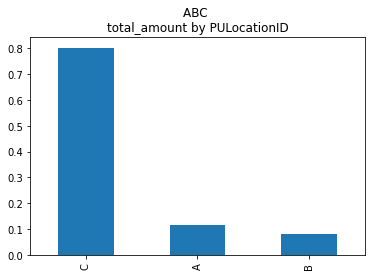

In [83]:
calculate_ABC(data, 'PULocationID', 'total_amount').value_counts(normalize=True).plot(kind='bar', title='ABC \ntotal_amount by PULocationID')

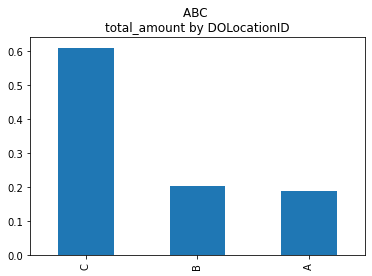

In [84]:
calculate_ABC(data, 'DOLocationID', 'total_amount').value_counts(normalize=True).plot(kind='bar', title='ABC \ntotal_amount by DOLocationID')

In [85]:
df_ABC_total = pd.DataFrame({'PULocationID':calculate_ABC(data, 'PULocationID', 'total_amount').value_counts(normalize=True),
                             'DOLocationID':calculate_ABC(data, 'DOLocationID', 'total_amount').value_counts(normalize=True)})
df_ABC_total#ABC по стартовым и конечным локациям total_amount

,PULocationID,DOLocationID
A,0.117871,0.187739
B,0.079848,0.203065
C,0.802281,0.609195


In [86]:
df_ABC_fare = pd.DataFrame({'PULocationID':calculate_ABC(data, 'PULocationID', 'fare_amount').value_counts(normalize=True),
                             'DOLocationID':calculate_ABC(data, 'DOLocationID', 'fare_amount').value_counts(normalize=True)})
df_ABC_fare#ABC по стартовым и конечным локациям fare_amount

,PULocationID,DOLocationID
A,0.121673,0.191571
B,0.079848,0.222222
C,0.798479,0.586207


In [87]:
def calculate_ABC_with_cat(df, col_cat, col_split, col_value):
  series = []
  for i in (list(data[col_cat].unique().categories)): #для каждой категории
    ABC_for_i = calculate_ABC(df[df[col_cat] == i], col_split, col_value) #ABC анализ
    series.append(ABC_for_i.value_counts(normalize=True).rename(str(i))) #сохраняем
  return pd.concat(series, axis=1)# соединяем

In [88]:
pd.concat([calculate_ABC_with_cat(data, 'VendorID', 'PULocationID', 'total_amount'),
           calculate_ABC_with_cat(data, 'VendorID', 'DOLocationID', 'total_amount')], keys=['PULocationID', 'DOLocationID']) 
#ABC для высадки и посадки в разбивке по операторам

1         2         4
PULocationID C  0.812500  0.793103  0.723270
             A  0.117188  0.118774  0.176101
             B  0.070312  0.088123  0.100629
DOLocationID C  0.644788  0.578544  0.628099
             B  0.177606  0.229885  0.181818
             A  0.177606  0.191571  0.190083

2.XYZ


In [174]:
def XYZ_segmentation(vol):
  if(vol <= 0.15):
    return 'X'
  elif(vol <= 0.25):
    return 'Y'
  else:
    return 'Z'

In [232]:
def calculate_XYZ_day_split(df, col_split, col_data):
  df_col_xyz = df[[col_split, col_data]].copy()
  df_col_xyz['day'] = df_col_xyz[col_data].dt.day
  grouped = df.groupby(['day', col_split]).size()
  vol = grouped.groupby(level=1).agg(['std', 'mean'])
  vol = vol[vol['mean'] > 1]
  vol['vol'] = vol['std'] / vol['mean']
  vol['XYZ'] = vol['vol'].apply(XYZ_segmentation)
  return vol['XYZ'].rename(col_split)

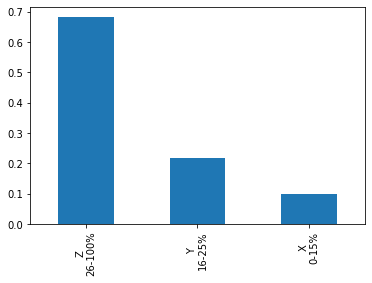

In [225]:
calculate_XYZ_day_split(data,'PULocationID', 'tpep_pickup_datetime').value_counts(normalize=True).rename({'X':'X\n0-15%',
                                                                                                          'Y':'Y\n16-25%',
                                                                                                          'Z':'Z\n26-100%'}).plot(kind='bar')

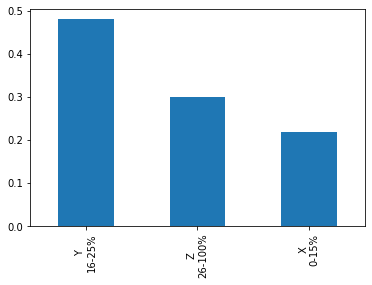

In [226]:
calculate_XYZ_day_split(data,'DOLocationID', 'tpep_pickup_datetime').value_counts(normalize=True).rename({'X':'X\n0-15%',
                                                                                                          'Y':'Y\n16-25%',
                                                                                                          'Z':'Z\n26-100%'}).plot(kind='bar')

In [227]:
pd.concat([calculate_XYZ_day_split(data,'DOLocationID', 'tpep_pickup_datetime').value_counts(normalize=True),
           calculate_XYZ_day_split(data,'PULocationID', 'tpep_pickup_datetime').value_counts(normalize=True)], axis=1)

,DOLocationID,PULocationID
Y,0.480769,0.219608
Z,0.300000,0.682353
X,0.219231,0.098039


In [228]:
def calculate_XYZ_with_cat(df, col_cat, col_split, col_data):
  series = []
  for i in (list(data[col_cat].unique().categories)): #для каждой категории
    XYZ_for_i = calculate_XYZ_day_split(df[df[col_cat] == i], col_split, col_data) #XYZ анализ
    series.append(XYZ_for_i.value_counts(normalize=True).rename(str(i))) #сохраняем
  return pd.concat(series, axis=1)# соединяем

In [233]:
calculate_XYZ_with_cat(data, 'VendorID', 'PULocationID', 'tpep_pickup_datetime')

,1,2,4
Z,0.757322,0.714286,0.774510
Y,0.175732,0.186508,0.215686
X,0.066946,0.099206,0.009804


3.


In [251]:
np.random.seed(10)
Loc_ID = np.random.choice(data['PULocationID'].unique(), 5, replace=False)
Loc_ID

array([ 62, 173, 146,   4, 243], dtype=int16)

In [287]:
df_PUL = data[data['PULocationID'].isin(Loc_ID) & data['VendorID'].isin([1,2])].copy()
df_PUL['PULocationID'].value_counts()

4      13850
146     6557
243     1405
62       688
173      281
Name: PULocationID, dtype: int64

In [288]:
df_DOL = data[data['DOLocationID'].isin(Loc_ID) & data['VendorID'].isin([1,2])].copy()
df_DOL['DOLocationID'].value_counts()

4      34476
243    12383
146     8473
62      3139
173     2230
Name: DOLocationID, dtype: int64

In [ ]:
Для нескольких одинаковых зон посадки и высадки (штук 5) сравните средние значения длительности поездки для операторов 1 и 2
Проверьте истинность гипотезы о равенстве среднего времени для выбранных маршрутов с помощью t критерия и pvalue (модуль stats)

In [292]:
df_PUL['time_trip'] = (df_PUL['tpep_dropoff_datetime'] - df_PUL['tpep_pickup_datetime']).dt.total_seconds()
df_DOL['time_trip'] = (df_DOL['tpep_dropoff_datetime'] - df_DOL['tpep_pickup_datetime']).dt.total_seconds()

In [301]:
time_PUL = df_PUL.groupby(['VendorID','PULocationID'])['time_trip'].mean().dropna().unstack()
time_PUL

PULocationID,4,62,146,173,243
VendorID,,,,,
1,709.533802,1402.378049,689.245926,877.000000,787.865116
2,1202.105932,1561.615385,996.561576,1300.955556,1417.375385


In [309]:
st.ttest_ind(time_PUL.loc[1], time_PUL.loc[2])
#pvalue достаточно мало, чтоб мы могли отвергнуть гипотезу о равенстве средних
#для случайно выбранных зон посадки

Ttest_indResult(statistic=-2.4732613033338633, pvalue=0.038514126946435245)

In [303]:
time_DOL = df_DOL.groupby(['VendorID','DOLocationID'])['time_trip'].mean().dropna().unstack()
time_DOL

DOLocationID,4,62,146,173,243
VendorID,,,,,
1,700.332274,1882.176944,906.975177,1441.680880,1268.724014
2,1054.832792,2435.380693,1360.013964,1921.521623,1829.282713


In [312]:
st.ttest_ind(time_DOL.loc[1], time_DOL.loc[2])
#pvalue не достаточно мало, чтоб мы могли отвергнуть гипотезу о равенстве средних
#для случайно выбранных зон высадки

Ttest_indResult(statistic=-1.5215100026733845, pvalue=0.1666263235235978)

In [317]:
check = data[data['VendorID'].isin([1,2])][['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'DOLocationID']].copy()
check['time'] = (check['tpep_dropoff_datetime'] - check['tpep_pickup_datetime']).dt.total_seconds()

In [324]:
check_time = check.groupby(['VendorID', 'DOLocationID'])['time'].mean().dropna().unstack().dropna(axis=1)
check_time

DOLocationID,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,...,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265
VendorID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2151.038384,1962.342541,700.332274,3006.000000,1573.367089,1043.919255,1145.428571,1524.074074,894.503759,1808.082474,1004.199393,974.641517,1801.521739,1633.828326,1593.992701,1505.350427,1801.403465,1552.448276,1704.40081,2052.180328,1984.294872,2536.309524,674.400305,1262.964193,2164.931694,2183.833333,1305.854478,1985.065134,1291.571429,1613.010753,1715.649194,1211.529428,1185.945392,1988.944990,1620.860981,1585.258848,1384.771186,1760.444643,1330.142278,791.044137,...,1017.940275,1752.711775,1534.643895,664.337247,787.760530,834.941275,795.964261,680.151899,656.653113,1591.761111,577.832394,617.041291,618.596203,604.067456,1394.607843,1745.065116,1669.118110,1268.724014,1124.111135,2367.090909,676.132978,1162.992465,1397.956667,638.506901,1447.265060,2181.244444,1461.204893,764.727273,1974.291803,1338.852059,1163.145059,1636.345852,1706.049774,1875.141079,1048.368572,1047.145986,653.099093,592.954629,707.632617,1703.519335
2,3137.946413,2449.814978,1054.832792,2649.157895,2810.049020,1555.697963,1207.716418,2029.910364,1294.986260,2966.693046,1546.696074,1397.144486,2221.269068,1694.757322,1941.100457,2323.143852,2402.134595,1770.582126,2684.87169,2783.211009,2353.861033,3399.813253,991.522915,1751.844578,2652.495460,2530.784615,1451.420101,2248.149864,2080.000000,1774.282609,2151.711948,1706.504134,1522.508658,2251.071259,2529.576350,2070.178571,1707.200337,2317.142582,1819.941064,1150.842494,...,1506.110894,2131.084729,2048.133134,988.299029,1188.572717,1258.722320,1248.862090,987.889896,973.312050,2018.539655,865.542961,893.953972,919.251780,908.770720,2299.339623,2259.813225,1904.767442,1829.282713,1542.414188,4600.119048,1019.222008,1799.568975,1762.086207,1019.494128,2031.546022,3323.000000,1608.359613,1312.941176,2026.846847,1955.575292,1881.993098,2146.106924,2372.576577,2480.188590,1385.599304,1558.570872,970.349449,873.488671,1305.180890,2554.459404


In [326]:
st.ttest_ind(check_time.loc[1], check_time.loc[2])

Ttest_indResult(statistic=-8.667857079307469, pvalue=5.712597821403104e-17)

In [ ]:
# ваш код начинается здесь